## K-Means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Nikiforova_prep.csv', sep=';')
df

,square,type,reviews,cars_per_day,average_income_of_customers,road,place_for_walk,coating_quality,spontaneous_trade,place_for_picnic,success
0,9.00,1,42.820513,12679.0,14910.0,0.0,0.0,0.0,0.0,0.0,0
1,30.00,1,8.000000,12800.0,9030.0,0.0,0.0,0.0,0.0,0.0,0
2,15.00,1,42.820513,77106.0,9030.0,0.0,0.0,0.0,0.0,0.0,0
3,20.00,1,42.820513,0.0,13930.0,0.0,0.0,0.0,0.0,0.0,0
4,30.00,0,42.820513,0.0,14560.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
59,30.00,1,25.000000,8771.0,11130.0,1.0,1.0,0.0,0.0,0.0,0
60,51.77,1,4.000000,146.0,9800.0,1.0,0.0,0.0,0.0,0.0,1
61,27.26,1,3.000000,6661.0,12600.0,0.0,0.0,0.0,0.0,0.0,1
62,50.93,0,17.000000,0.0,12460.0,0.0,0.0,0.0,0.0,0.0,0


Проводим шкалирование.

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['square','type','reviews','cars_per_day','average_income_of_customers','road','place_for_walk','coating_quality','spontaneous_trade','place_for_picnic','success']).round()

Для того, чтобы определить оптимальное количество кластеров, используем метод локтя. Видим, что можно выбрать либо 3, либо 4 кластера.

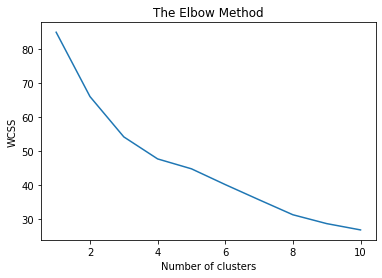

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Используем ещё один метод для окончательного определения - метод силуэта. Он нам говорит, что чем больше кластеров, тем лучше. Но я бы остановилась на 4.

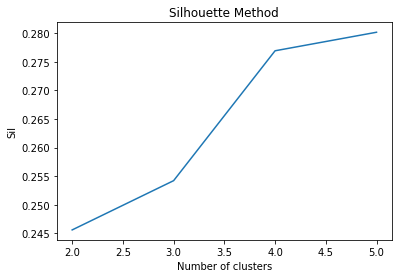

2:0.24560009439810224
3:0.254219815523203
4:0.27694393298684644
5:0.2801870872937213


In [5]:
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 6):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 6), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

Пока можем сказать, что с таким количеством не всегда значимых переменных очень сложно дать интерпретацию полученным кластерам. Поэтому предлагаю перейти к построению только на значимых переменных. Отмечу, что значимые переменные являются и самыми вариативными.

In [6]:
allkm = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(df)
allkms = KMeans(n_clusters = 4, random_state = 0).fit(df)
pd.DataFrame(allkms.cluster_centers_, columns = ['square','type','reviews','cars_per_day','average_income_of_customers','road','place_for_walk','coating_quality','spontaneous_trade','place_for_picnic','success'])

,square,type,reviews,cars_per_day,average_income_of_customers,road,place_for_walk,coating_quality,spontaneous_trade,place_for_picnic,success
0,0.000000,0.000000,0.083333,0.000000,0.166667,0.750000,1.0,0.000000,0.000000,0.083333,0.583333
1,0.066667,0.000000,0.066667,0.066667,0.000000,0.800000,0.0,0.200000,0.333333,0.066667,0.666667
2,0.095238,0.047619,0.000000,0.238095,1.000000,0.190476,0.0,0.095238,0.095238,0.047619,0.190476
3,0.312500,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.125000,0.000000,0.000000,0.062500


In [7]:
Y= df.iloc[:, [0,1,2,3,4,5,9]]

In [8]:
km3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(Y)
kms = KMeans(n_clusters = 3, random_state = 0).fit(Y)
pd.DataFrame(kms.cluster_centers_, columns = ['square','type','reviews','cars_per_day','average_income_of_customers','road','place_for_picnic']).round()

,square,type,reviews,cars_per_day,average_income_of_customers,road,place_for_picnic
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Теперь проведём кластеризацию только на значимых и вариативных переменных. Тип, отзывы и машины убираем, так как они не вариативны.

In [9]:
X = df.iloc[:, [0,4,5,9]]

Видим, что за методом локтя рекомендуется выделение 2 или 3 кластеров. За методом силуэта тоже рекомендуется чем больше, тем лучше. Но хорошо выделяются структуры уже на 3 кластерах, после чего темп роста снижается.

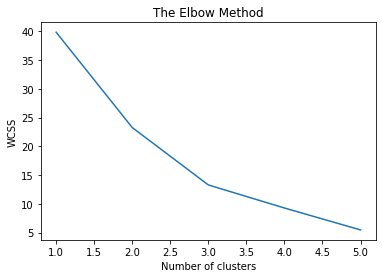

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 6), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

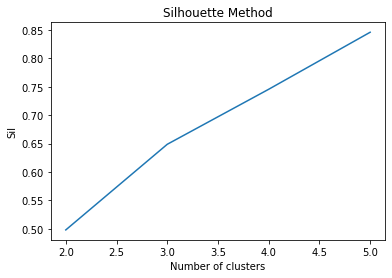

2:0.4981619981170857
3:0.6487679829756631
4:0.7455656114608471
5:0.8458545563573461


In [11]:
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 6):
  kmeans = KMeans(n_clusters = k).fit(X)  
  preds = kmeans.fit_predict(X)
  sil.append(silhouette_score(X, preds, metric = 'euclidean'))


plt.plot(range(2, 6), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

In [12]:
km_var = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 3, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['square','average_income_of_customers','road','place_for_picnic']).round()

,square,average_income_of_customers,road,place_for_picnic
0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0


Видим, что торговый точки были поделены на 3 кластера. Площадь и место для пикника не вариативны, но их удаление приводит в совсем маленькому выделению кластеров, в связи с этим теряется смысл кластеризации. Более подробное описание кластеров пропишу в конце следующего файла. 

1. Высокие доходы покупателей, нет покрытия у магазина
2. Низкие доходы покупателей, есть покрытие у магазина
3. Низкие доходы покупателей, нет покрытия у магазина

In [13]:
import pickle
input = open('clust.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc3 = obj["hc3"]
allhc5 = obj["allhc5"]
hc_var = obj["hc_var"]

Сравниваем результат кластеризации со всеми переменными и только со значимыми. На всех переменных с выделениеv 5 кластеров схождение 60%. А вот на заначимых с выделением 3 кластеров получили 70%, что является достаточно высоким показателем. На значимых вариативных переменных  получили аж 85,7%, что очень хорошо.Окончательный вывод сделаем в следующем файле.

In [14]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(allhc5,allkm)

0.6009569133584765

In [15]:
adjusted_rand_score(hc_var,km_var)

0.8575279401520429

In [16]:
adjusted_rand_score(hc3,km3)

0.6983852113360107

In [17]:
import pickle
obj = {'km_var': km_var,'allkm': allkm,'km3': km3}
output = open('clust-km.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()